In [1]:
import pandas as pd
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import geoplot as gplt
import geoplot.crs as gcrs

In [2]:
bnc = nc.Dataset('source_data/Complete_TAVG_LatLong1.nc', 'r')
bnc.variables.keys()

dict_keys(['longitude', 'latitude', 'time', 'land_mask', 'temperature', 'climatology'])

In [3]:
for var in bnc.variables.keys():
    print(var, bnc.variables[var].shape)

longitude (360,)
latitude (180,)
time (3286,)
land_mask (180, 360)
temperature (3286, 180, 360)
climatology (12, 180, 360)


In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
def world_bg():
    return world.boundary.plot(figsize=(10, 6), color='black', linewidth=0.5, edgecolor='black')

/var/folders/l_/zjyw1l0d37x3lbbq6x4vvs_00000gn/T/ipykernel_97638/4030743503.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [5]:
mlat, mlon = np.meshgrid(bnc.variables["latitude"][:], bnc.variables["longitude"][:])
print(mlat.shape)
data = gpd.GeoDataFrame(geometry=[Point(x,y) for x,y in zip(mlon.reshape(-1), mlat.reshape(-1))])

(360, 180)


In [6]:
climatology = bnc.variables['climatology'][:]
avg_temp = climatology.mean(axis=0)
print(avg_temp.shape)
data['avg_temp'] = avg_temp.T.reshape(-1)

(180, 360)


/var/folders/l_/zjyw1l0d37x3lbbq6x4vvs_00000gn/T/ipykernel_97638/2885645804.py:1: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  climatology = bnc.variables['climatology'][:]
/var/folders/l_/zjyw1l0d37x3lbbq6x4vvs_00000gn/T/ipykernel_97638/2885645804.py:1: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  climatology = bnc.variables['climatology'][:]


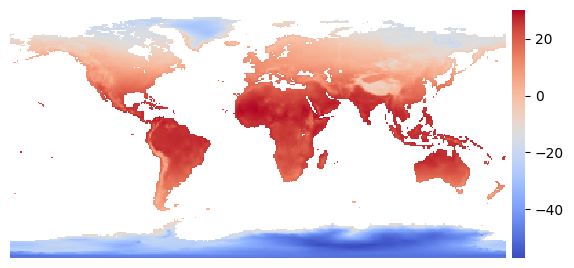

In [7]:
def plot_global(arr, name):
    fig = plt.figure()
    ax = plt.axes()
    im = ax.imshow(arr, extent=[-180,180,-90,90], cmap='coolwarm', origin='lower', interpolation='nearest')
    plt.axis('off')
    cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
    cb = plt.colorbar(im, cax=cax)
    cb.outline.set_visible(False)

    plt.savefig(f"imgs/{name}.png", bbox_inches='tight', pad_inches=0, dpi=300)

plot_global(avg_temp, "global_avg_temp")

(180, 360)

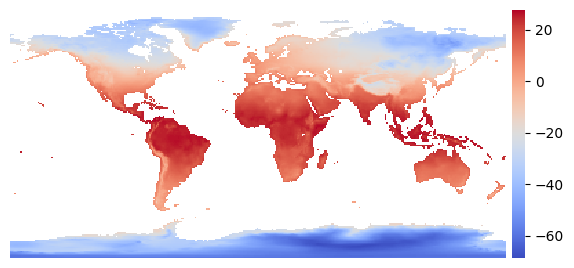

In [8]:
avg_min_month = climatology.min(axis=0)
plot_global(avg_min_month, "avg_temp_coldest_month")
data['avg_min_month'] = avg_min_month.T.reshape(-1)
avg_min_month.shape

(180, 360)

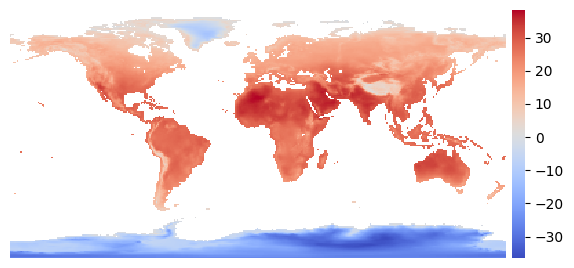

In [9]:
avg_max_month = climatology.max(axis=0)
plot_global(avg_max_month, "average_temp_warmest_month")
data['avg_max_month'] = avg_max_month.T.reshape(-1)
avg_max_month.shape

In [15]:
data.dropna().to_csv('gen_data/temp_covariates.csv')